<div style="text-align: center">
    <div style="font-size: xxx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">
        Matplotlib &amp; Seaborn
    </div>
    <div style="font-size: x-large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">
        Visualizing Data
    </div>
</div>

**Matplotlib** is a library for plotting a huge variety of figures. For example, scatter plots, histograms, line plots, contour plots, log plot,  polar charts, and basemaps.

Whenever you want to visualize something Matplotlib is a good starting point. However, Matplotlib has tons of configuration options and can be a little overwhelming.

A list of plots that Matplotlib supports can be found here: https://matplotlib.org/3.2.0/gallery/index.html

**Seaborn** is a library that builds upon matplotlib and adds new or combined plots as well as a streamlined interface to create plots for different categories of data. It also sets a bunch of default values for Matplotlib to create good looking visualizations.

Seaborn is a good choice when you already have data stored in Pandas DataFrames or you want a quick way to create good looking visualizations "by default".

A list of plots that Seaborn supports can be found here: https://seaborn.pydata.org/examples/index.html

## Matplotlib basics

There are two basic components in Matplotlib. `Figures` and `Axes`:

- `Figure`: This is like a canvas. You will place all objects on one. It is the outermost container.
    - Defines size of final image
    - Defines resolution in DPI (dots per inch)
    - Defines background color
    - Contains one or multiple Axes
- `Axes`: It sets the coordinate system of a plot. Everything related to it will be aligned according to its position and size.
    - Container for plot elements
    - Contains x-/y-Axis, Tick, Label, Lines, Text, Polygon, etc.
    - Sets the coordinate system

Matplotlib has two types of interfaces (ways to create a plot):

- Object-oriented (preferred way of this lecture): You will create objects (e.g. figures, axes) and call methods on them to adjust them to your liking.
- State-based (also called pyplot): This is a quick way to create a plot but can be more difficult to customize.

**Note**: These interfaces will often be used in a mix and match fashion but you should try to stick to the object-oriented interface when possible. 

### A detailed picture of all matplotlib components:
![matplotlib anatomy](https://matplotlib.org/_images/anatomy.png)

Source: https://matplotlib.org/examples/showcase/anatomy.html

### Importing Matplotlib and Seaborn

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

### Creating a Figure and an Axes

The easiest way to create a `Figure` and an `Axes` is to use `plt.subplots()`.

This will give you a `Figure` and 1 `Axes` attached to it. The Axes will have a default 2-d coordinate system from 0 to 1.0.

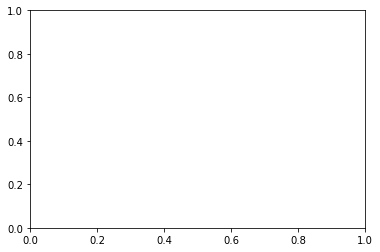

In [2]:
figure, axes = plt.subplots()

**Note**: The container for the coordinate system is called `Axes`. If you want to access the x-/y-axis they are called `Axis`.

### Showing and saving figures

If you are not running Matplotlib in a jupyter notebook you will have to call `figure.show()` to show a specific figure or `plt.show()` to show all figures.

If you are in Matplotlib, it will raise a warning!

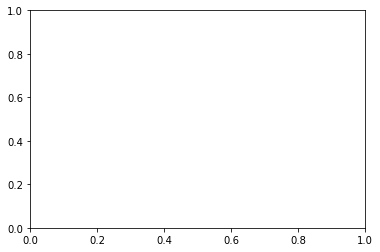

In [3]:
figure, axes = plt.subplots()

# Save it
figure.savefig("lecture_13/figure.png")
# You can also save as e.g. *.svg, *.jpeg, *.pdf

# Always call this after save. It will "destroy" the plot!
# figure.show() # Not required in Matplotlib

### Changing the appearance of an Axes

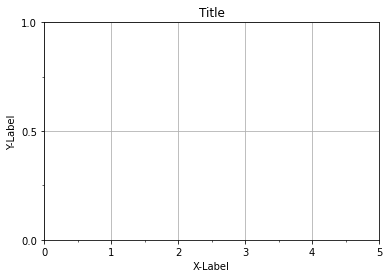

In [4]:
figure, axes = plt.subplots()

axes.set_title('Title')
axes.set_xlabel('X-Label') # Short for: axes.xaxis.set_label([...])
axes.set_ylabel('Y-Label') # Short for: axes.yaxis.set_label([...])

axes.set_xticks([0, 1, 2, 3, 4, 5]) # Short for: axes.xaxis.set_ticks([...])
axes.set_yticks([0, 0.5, 1.0])      # Short for: axes.yaxis.set_ticks([...])

axes.set_xticks([0.5, 1.5, 2.5, 3.5, 4.5], minor=True)
axes.set_yticks([0.25, 0.75], minor=True)

axes.grid(True)
pass

### Creating multiple Axes (subplots)

Sometimes you want to have multiple plots showing different things within a `Figure`.

In this case you can specify the number of subplots by setting the `#rows` and the `#columns` your figure should have.

**Note**: Here, `plt.subplots` will still return a single `Figure` but multiple `Axes` are attached to it.

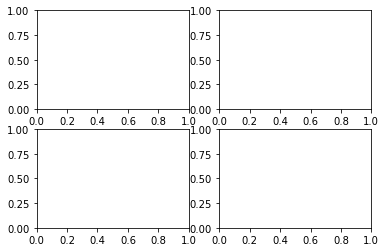

In [5]:
figure, axes = plt.subplots(nrows=2, ncols=2)

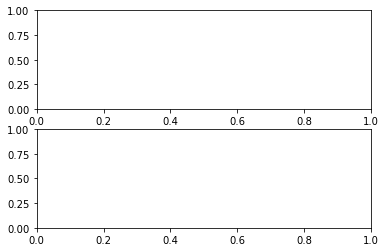

In [6]:
figure, axes = plt.subplots(nrows=2, ncols=1)

**Sharing Axis across subplots**

Sometimes you want to have multiple subplots but they all have the same axis. Matplotlib allows you to specify which subplots should share axis.

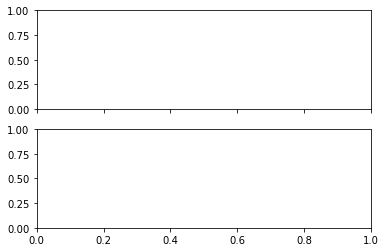

In [7]:
figure, axes = plt.subplots(nrows=2, ncols=1, sharex=True)

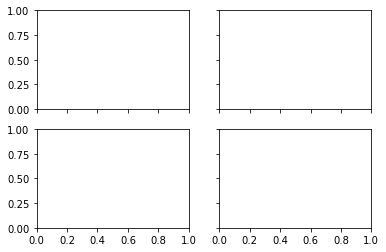

In [8]:
figure, axes = plt.subplots(
    nrows=2, ncols=2,
    sharex='col', # x-axis shared per column
    sharey='row' # y-axis shared per row
)

### Working with subplots

When specifying multiple rows or columns for `plt.subplots` the returned axes is a numpy array with the specified shape.

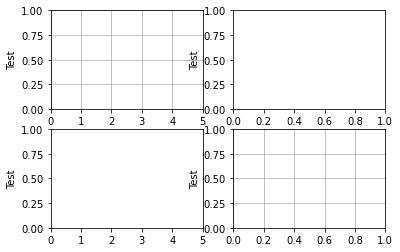

In [9]:
figure, axes = plt.subplots(nrows=2, ncols=2)

axes[0, 0].grid(True)
axes[1, 1].grid(True)

# Change all axes
for ax in axes.flatten():
    ax.set_ylabel('Test')

# Change the first column
for ax in axes[:, 0]:
    ax.set_xticks([0, 1,2,3,4,5])

In [10]:
type(axes)

numpy.ndarray

In [11]:
axes.shape

(2, 2)

### Preventing overlapping labels

As you can see in the example above, having multiple axes may result in overlapping regions.

There are multiple ways to solve this problem:

1. Using an automatic way (might sometimes fail, but always a good first option)
2. Increasing the figure size
3. Manual adjustment

**1. Using an automatic way**

Removes whitespace, adjusts padding and some more.
Always do this just before you want to show/save your figure so that
all information are available for the best result!

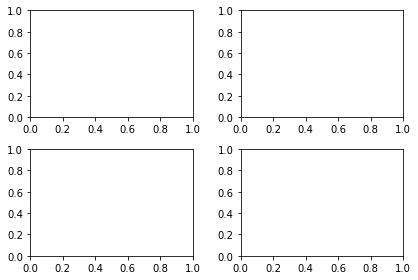

In [12]:
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.tight_layout()

**2. Increasing the figure size (the default size is (4,3))**

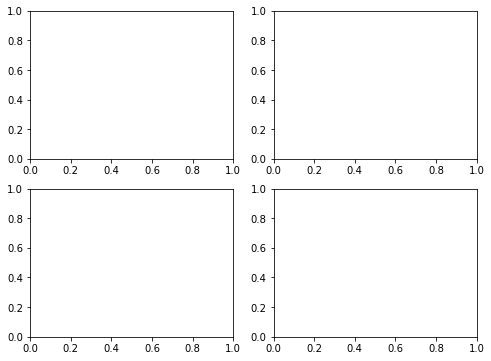

In [13]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,6))

**3. Manual adjustment**

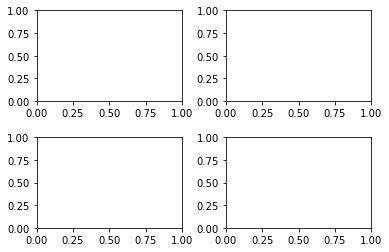

In [14]:
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.subplots_adjust(
    wspace=0.3, # vertical space
    hspace=0.4  # horizontal space
)

### Plotting data (Matplotlib)

Given an `Axes` object it is possible to plot any kind of data in it.

There is a multitude of plot types available. We will focus on some common ones:

- Line plot
- Scatter plot
- Histogram
- Contour plot
- Polar plot

A complete list can be found here: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html

#### Loading/Creating example data

You should be familiar with this dataset by now.

In [15]:
import numpy as np
time, ns, ew, ud = np.loadtxt("lecture_13/station_1.dat", unpack=True)
time2, ns2, ew2, ud2 = np.loadtxt("lecture_13/station_2.dat", unpack=True)

# Random data
np.random.seed(0)
x = np.random.randn(100)
y = x + np.random.randn(100) + 10
z = np.abs(np.random.randn(100) * 80)
y2 = x + np.random.randn(100) + 15

#### Line plot

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

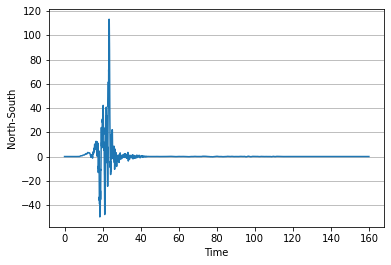

In [16]:
figure, axes = plt.subplots()
axes.plot(time, ns)
axes.set_ylabel("North-South")
axes.set_xlabel("Time")
axes.grid(True, axis="y")

#### Scatter plot
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter

Visualizes 2-d data in a coordinate system. Color, shape, and size can be used to display additional dimensions.

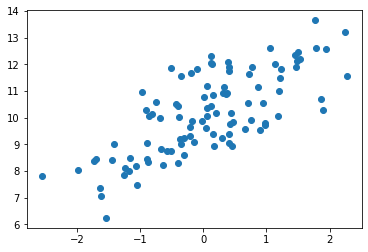

In [17]:
figure, axes = plt.subplots()
paths = axes.scatter(x, y)

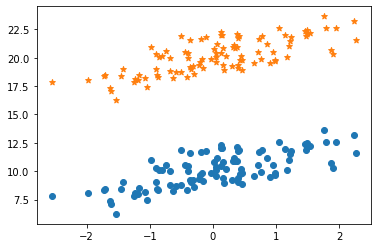

In [18]:
figure, axes = plt.subplots()
paths = axes.scatter(x, y)
paths = axes.scatter(
    x, y + 10, 
    marker='*' # Changes the style of the dots
)

**Customizing scatter plots**

You can use `color`, `size` and a `colorbar` if you can/want to add a third dimension to your plot.

If you use a `colorbar` you have to link the plotted data with the colorbar. To do that you can use the return value of plotting functions, such as `scatter`, as an argument to `colorbar()`. The return value of plotting functions is called an `Artist`. Basically everything that you place on a figure is an `Artist`.

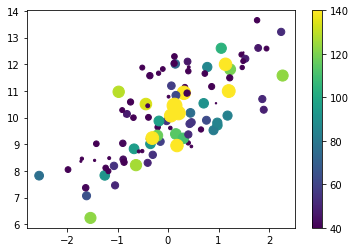

In [19]:
figure, axes = plt.subplots()
artist = axes.scatter(
    x,
    y,
    c=z, # color
    s=z, # size
    # Color and size both depend on "z"
    # You can make them dependent on any data
    vmin=40, # allowed range of colors (optional)
    vmax=140, # allowed range of colors (optional)
)
_ = figure.colorbar(artist)

#### Histogram

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

A histogram shows the distribution of numerical data. It is an estimate of a probability distribution. 

To draw discrete bars, the first is to define a number of bins, i.e. buckets, to separate the data into.

Matplotlib internally uses `numpy.histogram` to automatically do that for you for a user provided number of `bins`.

In [20]:
# Random data (0 to 9, 100 values)
np.random.seed(0)
hist_data = np.random.randint(0, 10, size=[100])
np.histogram(hist_data)[0] # Returns how often each number occurs

array([11,  9,  7, 15, 14, 11,  5, 10,  8, 10], dtype=int64)

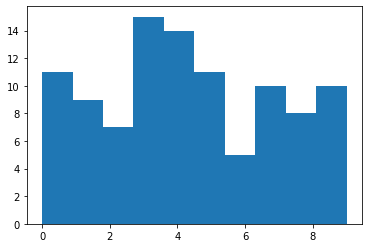

In [21]:
figure, axes = plt.subplots()
bins, boundaries, artists = axes.hist(
    hist_data,
    bins=10 # Separate data into 10 bins
)

#### Contour plot
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contour.html#matplotlib.pyplot.contour

The contour plot is used to answer the question:

    How does Z change as a function of X and Y? 

In [22]:
# Random data
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)

def fn(x, y):
    return np.sqrt(x**2 + y**2)

Z = fn(X, Y)

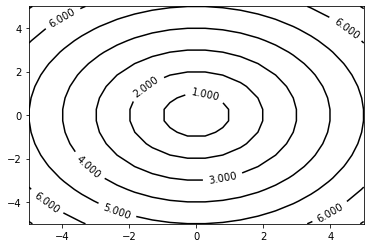

In [23]:
figure, axes = plt.subplots()

# This would plot the grid of data points we have (created by linspace and meshgrid)
# axes.scatter(X, Y, color='gray', alpha=0.4)

contour_artist = axes.contour(X, Y, Z, colors='k')
label_artist = axes.clabel(contour_artist, inline=True, fontsize=10)

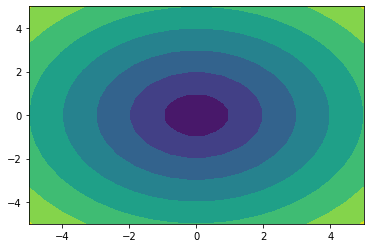

In [24]:
figure, axes = plt.subplots()
contour_artist = axes.contourf(X, Y, Z)

#### Polar plot

A polar plot is a projection of the coordinate system. You specify it during the creation of the `Axes`.

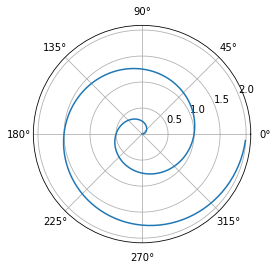

In [25]:
figure, axes = plt.subplots(subplot_kw={'projection': 'polar'})

r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

axes.plot(theta, r)
axes.set_rticks([0.5, 1, 1.5, 2]) # Radial ticks
pass

#### Horizontal & Vertical lines

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.hlines.html#matplotlib.axes.Axes.hlines

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.vlines.html#matplotlib.axes.Axes.vlines

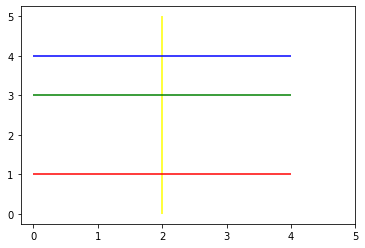

In [26]:
figure, axes = plt.subplots()

axes.vlines(2, 0, 5, color="yellow")
axes.hlines([1, 3, 4], 0, 4, colors=['r', 'g', 'b'])

# Set ticks afterwards, otherwise vlines & hlines override it...
axes.set_xticks([0,1,2,3,4,5])
axes.set_yticks([0,1,2,3,4,5])
pass

**Changing which artist is on top**

The default drawing order for axes is patches, lines, text.  This
order is determined by the zorder attribute.  The following defaults
are set

| Artist                  | Z-order |
|-------------------------|---------|
| Patch / PatchCollection | 1       |
| Line2D / LineCollection | 2       |
| Text                    | 3       |

You can change the order for individual artists by setting the zorder. Any
individual `plot()` call can set a value for the zorder of that particular item.

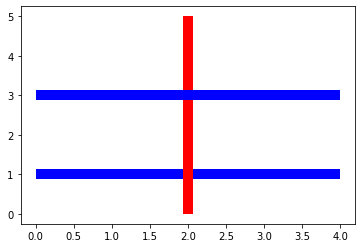

In [27]:
figure, axes = plt.subplots()

axes.vlines(2, 0, 5, color="red", linewidth=10.0) # default z-order
axes.hlines(3, 0, 4, color="b", linewidth=10.0, zorder=10) # on top
axes.hlines(1, 0, 4, color="b", linewidth=10.0, zorder=0) # below

#### Plotting Different Datasets

If you have different datasets you can call any of the plotting methods again to plot additional points on the same `Axes`.

Specifying `label` allows to later show a legend with `Axes.legend()`.

With `color` you can change the color of the plotted data.

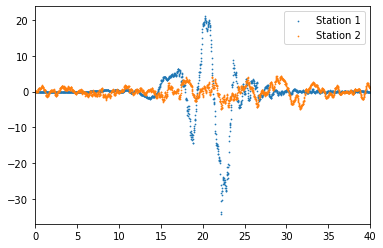

In [28]:
figure, axes = plt.subplots()
axes.scatter(time, ud, s=0.5, label='Station 1')
axes.scatter(time2, ud2, s=0.5, label='Station 2')

axes.set_xlim([0, 40]) # Only show values from x = 0 to 40

_ = axes.legend()

#### Further customization

We will not go in detail here but generally it is possible to adjust:

- the tick positions and labels on x-/y-axis
- font size
- font color
- font type
- colors of axes
- add additional x-axes to an axes
- plot images
- position text on a plot
- ... and many more

### Plotting data (Seaborn)

A list of all available plot types: https://seaborn.pydata.org/api.html

In [29]:
import pandas as pd
station_data = pd.read_csv(
    'lecture_13/station.dat',
    comment='#',
    sep='\t',
    names=['times', 'ns', 'ew', 'ud']
)
station_data

,times,ns,ew,ud
0,0.00,0.046748,0.035354,0.055248
1,0.02,0.097089,0.086348,0.021586
2,0.04,0.154333,0.131712,-0.099706
3,0.06,0.166724,0.148960,-0.079986
4,0.08,0.171430,0.136686,0.112246
...,...,...,...,...
2495,49.90,0.020181,0.009544,0.028026
2496,49.92,0.020776,0.011317,0.027743
2497,49.94,0.021535,0.013332,0.027661
2498,49.96,0.022452,0.015557,0.027845


#### Lineplot

https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot

=> More examples are further down the page

Pandas will automatically create a `Figure` and `Axes` if none is provided.

Data is normally provided as a Pandas `DataFrame` through the `data=` argument.

Many of the seaborn functions return the `Axes` object for further manipulation.

**Plot data (without times)**

(200.0, 1500.0)

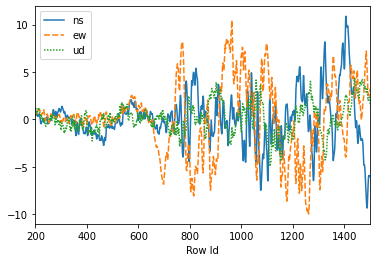

In [30]:
ax = sns.lineplot(data=station_data[['ns', 'ew', 'ud']])
label_artist = ax.set_xlabel('Row Id')

ax.set_xlim([200, 1500]) # Only show values from x = 200 to 1500

**Plot data (with x-Axis = times)**

In [31]:
# We have to change the format for the lineplot function: x, y, hue
# x = times
# y = value
# hue = motion (this separates "ns", "ew", "ud")

# melt() picks one or multiple columns as identifiers and the other
# columns will store measured variables.
melted_station_data = station_data.melt(
    id_vars='times', # identifier
    var_name='motion' # measured variable
)
melted_station_data

,times,motion,value
0,0.00,ns,0.046748
1,0.02,ns,0.097089
2,0.04,ns,0.154333
3,0.06,ns,0.166724
4,0.08,ns,0.171430
...,...,...,...
7495,49.90,ud,0.028026
7496,49.92,ud,0.027743
7497,49.94,ud,0.027661
7498,49.96,ud,0.027845


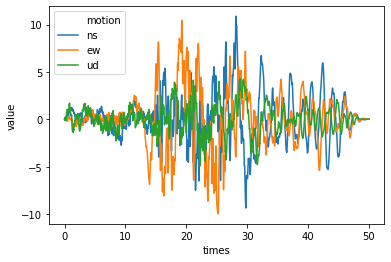

In [32]:
# Now we can feed the data to lineplot and tell it what x, y and hue (color) are
ax = sns.lineplot(
    data=melted_station_data,
    x='times', # x-axis
    y='value', # y-axis
    hue='motion', # colors
)

#### Scatter plot

https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot

=> More examples are further down the page

In this example we are only interested in a time frame of 0 to 40.

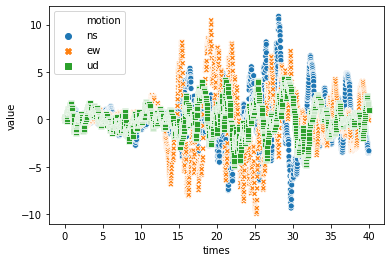

In [33]:
msd_lt40 = melted_station_data.loc[melted_station_data['times'] < 40]
ax = sns.scatterplot(
    data=msd_lt40,
    x='times', # x-axis
    y='value', # y-axis
    hue='motion', # colors
    style='motion', # markers (optional)
)

And here we are only plottig the up-down motion in the 0 to 40 time frame.

We also color the points based on the 

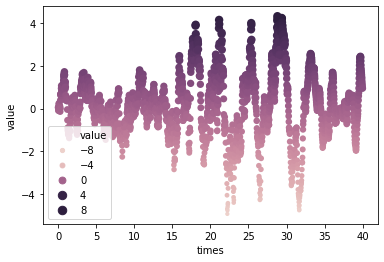

In [34]:
msd_lt40_ud = msd_lt40.loc[msd_lt40['motion'] == 'ud']
ax = sns.scatterplot(
    data=msd_lt40_ud,
    x='times', # x-axis
    y='value', # y-axis
    hue='value', # colors
    size='value', # size (This way you could also add a third dimension)
    linewidth=0, # Remove the white border around the dots
)

#### Histogram

https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot

Note: Seaborn will automatically select a number of `bins`. You can also manually set them with `bins=`.

In [35]:
np.random.seed(0) # This will guarantee the same random results

# Random data
x = np.random.normal(size=100)
x2 = np.random.normal(size=100) - 3

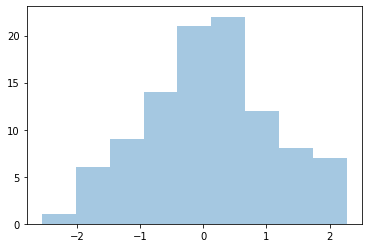

In [36]:
ax = sns.distplot(
    x,
    kde=False # This is too complex for this lecture
)

**Plotting two or more datasets on a single Axes**

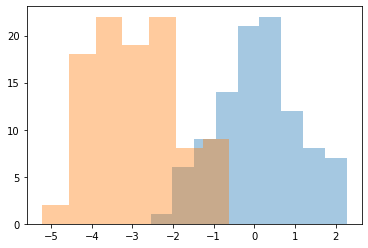

In [37]:
ax = sns.distplot(x, kde=False)
sns.distplot(x2, kde=False, ax=ax);

#### Plotting on subplots

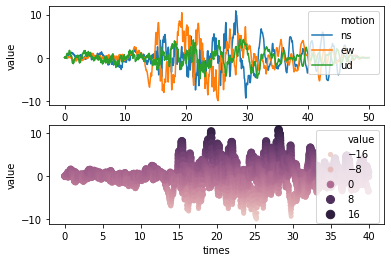

In [38]:
fig, axes = plt.subplots(2, 1)
ax1 = sns.lineplot(
    ax=axes[0], # Specify the axes
    data=melted_station_data,
    x='times', # x-axis
    y='value', # y-axis
    hue='motion', # colors
)
ax2 = sns.scatterplot(
    ax=axes[1], # Specify the axes
    data=msd_lt40,
    x='times', # x-axis
    y='value', # y-axis
    hue='value', # colors
    size='value', # size (This way you could also add a third dimension)
    linewidth=0, # Remove the white border around the dots
)

# Summary

* You know the `Matplotlib` basics
    - Objects
        - Figure
        - Axes
        - Axis
    - Subplots
        - sharing axis
        - fixing layouting problems
    - Customization
        - title
        - label
        - ticks
    - Plot types
        - Line
        - Scatter
        - Histogram
        - Contour
        - Polar
        - Hline, Vline
* You know the basics of plotting data with `Seaborn`
    - Data handling
    - Plot types
        - Lineplot
        - Scatterplot
        - Histogram
    - Combining Matplotlib and Seaborn plots
    - Customization
* You know where to look for more details

### Next excercise: [Exercise 13](exercise_13_matplotlib_seaborn.ipynb)
### Next lecture: [Theory - Fourier Transformation](lecture_14_theory_fourier.ipynb)

---
##### Authors:
* [Julian Niedermeier](https://github.com/sleighsoft)